# Linear Regression 구현
### 아래 데이터를 이용하여 각 항목별 연관 관계를 분석하고 선형 회귀 분석 기법을 통해 상관 관계를 그래프로 표시하시오.

In [298]:
import pandas as pd
import matplotlib.pyplot as plt

data = {'year': [2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016], 
        'month': [12,11,10,9,8,7,6,5,4,3,2,1,12,11,10,9,8,7,6,5,4,3,2,1],
        'interest_rate': [2.75,2.5,2.5,2.5,2.5,2.5,2.5,2.25,2.25,2.25,2,2,2,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75],
        'unemployment_rate': [5.3,5.3,5.3,5.3,5.4,5.6,5.5,5.5,5.5,5.6,5.7,5.9,6,5.9,5.8,6.1,6.2,6.1,6.1,6.1,5.9,6.2,6.2,6.1],
        'index_price': [1464,1394,1357,1293,1256,1254,1234,1195,1159,1167,1130,1075,1047,965,943,958,971,949,884,866,876,822,704,719]}

df = pd.DataFrame(data)
df

,year,month,interest_rate,unemployment_rate,index_price
0,2017,12,2.75,5.3,1464
1,2017,11,2.50,5.3,1394
2,2017,10,2.50,5.3,1357
3,2017,9,2.50,5.3,1293
4,2017,8,2.50,5.4,1256
5,2017,7,2.50,5.6,1254
6,2017,6,2.50,5.5,1234
7,2017,5,2.25,5.5,1195
8,2017,4,2.25,5.5,1159
9,2017,3,2.25,5.6,1167


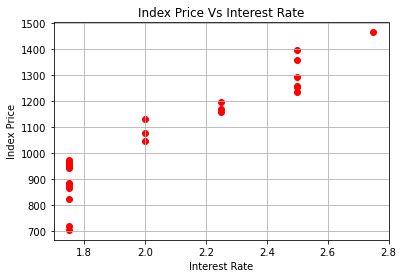

In [299]:
# 물가지수와 이자율 산점도
plt.scatter(df['interest_rate'], df['index_price'], color = 'red')
plt.title('Index Price Vs Interest Rate')
plt.xlabel('Interest Rate')
plt.ylabel('Index Price')
plt.grid(True)
plt.show()

In [300]:
# 훈련 세트와 테스트 세트 준비
from sklearn.model_selection import train_test_split
import numpy as np

train_input, test_input, train_target, test_target = train_test_split(
df['interest_rate'], df['index_price'], random_state=42)

train_input = np.array(train_input)
test_input = np.array(test_input)

# reshape(-1, 1): -1: 행의 크기를 자동 지정
train_input = train_input.reshape(-1, 1)  # 2차원 배열로 변경
test_input = test_input.reshape(-1, 1)  # 2차원 배열로 변경

In [301]:
# 훈련 데이터를 이용한 직선 방정식 구하기
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

# 선형 회귀 모델 훈련
lr.fit(train_input, train_target)

# 기울기(a): codf_, 절편(bias): intercept_
print('Interest Rate vs. Index Price\n'f'coef_:{lr.coef_}, intercept_:{lr.intercept_}')

Interest Rate vs. Index Price
coef_:[574.45637584], intercept_:-127.38255033557084


In [302]:
print('train data score: ',
     lr.score(train_input, train_target))
print('test data score: ',
     lr.score(test_input, test_target))

train data score:  0.8541859618501457
test data score:  0.941892392945057


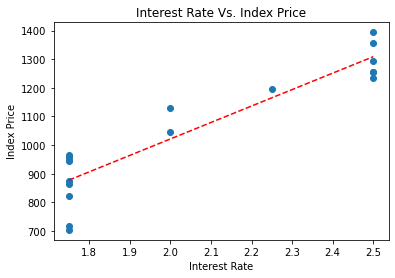

In [303]:
# 기울기와 절편을 이용한 1차 방정식 그래프
import matplotlib.pyplot as plt

plt.scatter(train_input, train_target)

# 1차 방정식 그래프 그리기
# plot([x축 데이터:시작, 끝], [y축 데이터:시작, 끝])
plt.plot([train_input.min(), train_input.max()], 
        [train_input.min()*lr.coef_ + lr.intercept_, train_input.max()*lr.coef_ + lr.intercept_],
        color='red', linestyle='--')
plt.title('Interest Rate Vs. Index Price')
plt.xlabel('Interest Rate')
plt.ylabel('Index Price')
plt.show()

# 다항 회귀: 이자율과 물가지수 상관 관계 분석

In [304]:
# 훈련 세트에 데이터 추가
train_poly = np.column_stack((train_input**2, train_input))
test_poly = np.column_stack((test_input**2, test_input))

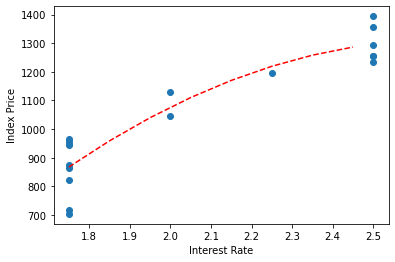

In [305]:
# 다항 회귀식을 이용한 그래프 그리기
point = np.arange(train_input.min(), train_input.max(), 0.1)

plt.scatter(train_input, train_target)

plt.plot(point, -524.84946237*point**2 + 2802.42473118*point -2429.1028225806517,
        color='red', linestyle='--')
plt.xlabel('Interest Rate')
plt.ylabel('Index Price')
plt.show()

In [306]:
# 다항 회귀식 구하기
lr = LinearRegression()
lr.fit(train_poly, train_target)

print('이자율과 물가지수 다항 회귀\n'f'다항 회귀 coef_:{lr.coef_}, intercept_:{lr.intercept_}')

이자율과 물가지수 다항 회귀
다항 회귀 coef_:[-524.84946237 2802.42473118], intercept_:-2429.1028225806517


In [307]:
print('다항 회귀 train data score:', lr.score(train_poly, train_target))
print('다항 회귀 train data score:', lr.score(test_poly, test_target))

다항 회귀 train data score: 0.8676269364555872
다항 회귀 train data score: 0.7945265214367343


# 선형 회귀: 실업률과 물가지수 상관 관계 분석

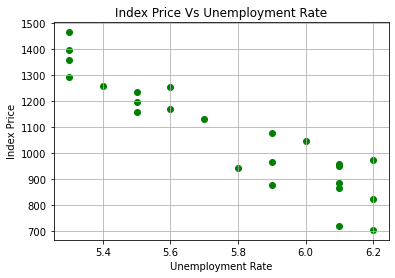

In [308]:
# 실업률과 물가지수 산점도
plt.scatter(df['unemployment_rate'], df['index_price'], color = 'green')
plt.title('Index Price Vs Unemployment Rate')
plt.xlabel('Unemployment Rate')
plt.ylabel('Index Price')
plt.grid(True)
plt.show()

In [309]:
# 훈련 세트와 테스트 세트 준비
from sklearn.model_selection import train_test_split
import numpy as np

train_input, test_input, train_target, test_target = train_test_split(
df['unemployment_rate'], df['index_price'], random_state=42)

train_input = np.array(train_input)
test_input = np.array(test_input)

# reshape(-1, 1): -1: 행의 크기를 자동 지정
train_input = train_input.reshape(-1, 1)  # 2차원 배열로 변경
test_input = test_input.reshape(-1, 1)  # 2차원 배열로 변경

In [310]:
# 훈련 데이터를 이용한 직선 방정식 구하기
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

# 선형 회귀 모델 훈련
lr.fit(train_input, train_target)

# 기울기(a): codf_, 절편(bias): intercept_
print('Unemployment Rate vs. Index Price\n', f'coef_:{lr.coef_}, intercept_:{lr.intercept_}')

Unemployment Rate vs. Index Price
 coef_:[-611.41330166], intercept_:4586.05463182898


In [311]:
print('train data score: ',
     lr.score(train_input, train_target))
print('test data score: ',
     lr.score(test_input, test_target))

train data score:  0.8748908875163574
test data score:  0.707475113377226


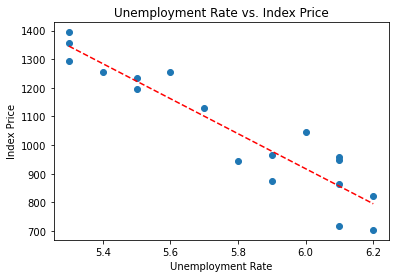

In [312]:
# 기울기와 절편을 이용한 1차 방정식 그래프
import matplotlib.pyplot as plt

plt.scatter(train_input, train_target)

# 1차 방정식 그래프 그리기
# plot([x축 데이터:시작, 끝], [y축 데이터:시작, 끝])
plt.plot([train_input.min(), train_input.max()], 
        [train_input.min()*lr.coef_ + lr.intercept_, train_input.max()*lr.coef_ + lr.intercept_],
        color='red', linestyle='--')
plt.title('Unemployment Rate vs. Index Price')
plt.xlabel('Unemployment Rate')
plt.ylabel('Index Price')
plt.show()

# 다항 회귀: 실업률과 물가지수 상관 관계 분석

In [313]:
# 훈련 세트에 데이터 추가
train_poly = np.column_stack((train_input**2, train_input))
test_poly = np.column_stack((test_input**2, test_input))

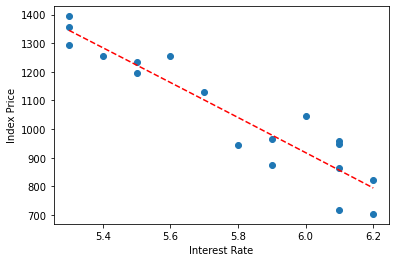

In [314]:
# 다항 회귀식을 이용한 그래프 그리기
point = np.arange(train_input.min(), train_input.max(), 0.1)

plt.scatter(train_input, train_target)

plt.plot(point, -7.26428138*point**2 - 527.97932022*point + 4347.248197109266,
        color='red', linestyle='--')

plt.xlabel('Interest Rate')
plt.ylabel('Index Price')
plt.show()

In [315]:
# 다항 회귀식 구하기
lr = LinearRegression()
lr.fit(train_poly, train_target)

print('실업률과 물가지수 다항 회귀\n'f'다항 회귀 coef_:{lr.coef_}, intercept_:{lr.intercept_}')

실업률과 물가지수 다항 회귀
다항 회귀 coef_:[  -7.26428138 -527.97932022], intercept_:4347.248197109266


In [316]:
print('다항 회귀 train data score:', lr.score(train_poly, train_target))
print('다항 회귀 train data score:', lr.score(test_poly, test_target))

다항 회귀 train data score: 0.8748971920999006
다항 회귀 train data score: 0.7057073065929076
